In [ ]:
%pylab inline
#%matplotlib qt
from __future__ import division # use so 1/2 = 0.5, etc.
import sigsys
import imp # used for module reload after editing, e.g., imp.reload(alias)
import scipy.signal as signal
from IPython.display import Audio, display
from IPython.display import Image, SVG

In [2]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
#pylab.rcParams['figure.figsize'] = (6.0, 4.0) # default (6,4)
%config InlineBackend.figure_formats=['png'] # default for inline viewing
#%config InlineBackend.figure_formats=['svg'] # SVG inline viewing
#%config InlineBackend.figure_formats=['pdf'] # render pdf figs for LaTeX

# Playback Using the Notebook Audio Widget
This interface is used often when developing algorithms that involve processing signal samples that result in audible sounds. You will see this in the tutorial. Processing is done before hand as an analysis task, then the samples are written to a `.wav` file for playback using the PC audio system.

In [3]:
Audio('c_major.wav')

Below I import the `.wav` file so I can work with the signal samples:

In [4]:
fs,x = sigsys.from_wav('c_major.wav')

Here I visualize the C-major chord using the *spectrogram* to see the chord as being composed or the fundamental or root plus two third and fifth harmonics or overtones.

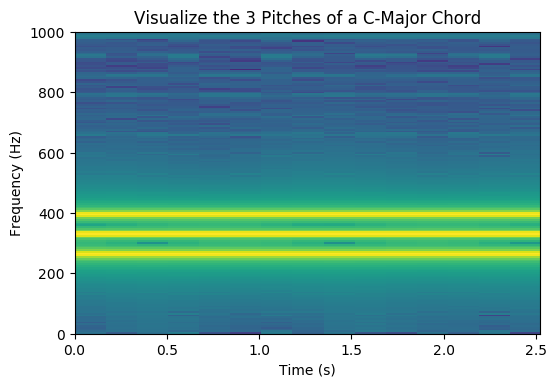

In [6]:
specgram(x,NFFT=2**13,Fs=fs);
ylim([0,1000])
title(r'Visualize the 3 Pitches of a C-Major Chord')
xlabel(r'Time (s)')
ylabel(r'Frequency (Hz)');

# Using Pyaudio: Callback with a `wav` File Source
With Pyaudio you set up a real-time interface between the audio source, a processing algorithm in Python, and a playback means. In the test case below the wave file is read into memory then played back frame-by-frame using a *callback* function. In this case the signals samples read from memory, or perhaps a buffer, are passed directly to the audio interface. In general processing algorithms may be implemented that operate on each frame. We will explore this in the tutorial.

In [ ]:
import pyaudio
import wave
import time
import sys

In [ ]:
"""PyAudio Example: Play a wave file (callback version)"""

wf = wave.open('Music_Test.wav', 'rb')
#wf = wave.open('c_major.wav', 'rb')
print('Sample width in bits: %d' % (8*wf.getsampwidth(),))
print('Number of channels: %d' % wf.getnchannels())
print('Sampling rate: %1.1f sps' % wf.getframerate())

p = pyaudio.PyAudio()

def callback(in_data, frame_count, time_info, status):
    data = wf.readframes(frame_count)
    #In general do some processing before returning data
    #Here the data is in signed integer format
    #In Python it is more comfortable to work with float (float64) 
    return (data, pyaudio.paContinue)

stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True,
                stream_callback=callback)

stream.start_stream()

while stream.is_active():  
    time.sleep(0.1)

stream.stop_stream()
stream.close()
wf.close()

p.terminate()